# Well, Well Wellness Aps :
A comparative analysis of top 5 grossing health/wellness apps - customer clustering and sentiment analysis using NLP to develop language descriptors for best and worst app reviews to inform what is going well and what could be improved in the world of wellness apps. 

# Obtain:

Inspired by: https://www.curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/ SEVERAL copies of this same project exist in various formats by various authors.

going to App Annie and looking at top grossing wellness apps:
https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=

In [1]:
#!pip install google_play_scraper

In [2]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

## Top 5 Wellness Apps:

According to [appannie](https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=), the top five grossing wellness apps on July 1 for the google play store in order:

1. Calm
* MyFitnessPal
* Headspace
* Me
* Fitbit

Rankings change daily.

Data on each package was obtained using [google play scraper](https://pypi.org/project/google-play-scraper/). Overviews of each app can be observed below:

In [3]:
#creating a list of top apps based on their google play app id

app_packages = [
    'com.calm.android',
    'com.myfitnesspal.android',
    'com.getsomeheadspace.android', 
    'com.gen.workoutme',
    'com.fitbit.FitbitMobile'
]

In [4]:
#obtaining information on each app and descriptive history using google_play_scraper api
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


In [5]:
app_infos_df = pd.DataFrame.from_records(app_infos)

##  App Descriptions and Summaries below:

In [6]:
app_infos_df

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,"Calm - Meditate, Sleep, Relax",Calm is a leading app for meditation and sleep...,Calm is a leading app for meditation and sleep...,Join the millions discovering the life-changin...,Join the millions discovering the life-changin...,"10,000,000+",10000000,4.392654,265756,90336,...,None,None,None,"Jul 30, 2014",1594046518,Varies with device,"As always, you can expect an original Daily Ca...","As always, you can expect an original Daily Ca...",com.calm.android,https://play.google.com/store/apps/details?id=...
1,Calorie Counter - MyFitnessPal,"Whether you want to lose weight, tone up, get ...","Whether you want to lose weight, tone up, get ...","Lose weight with MyFitnessPal, the easiest cal...","Lose weight with MyFitnessPal, the easiest cal...","50,000,000+",50000000,4.446240,2301782,805930,...,None,True,True,"Apr 26, 2010",1593538571,Varies with device,Whether you want to log your lowest weight in ...,Whether you want to log your lowest weight in ...,com.myfitnesspal.android,https://play.google.com/store/apps/details?id=...
2,Headspace: Meditation & Sleep,Learn the life-changing skills of meditation i...,Learn the life-changing skills of meditation i...,Meditation and mindfulness in just a few minut...,Meditation and mindfulness in just a few minut...,"10,000,000+",10000000,3.444766,133220,54096,...,None,None,None,"Jan 6, 2012",1593734924,4.1.1,The latest release features a fresh all-new lo...,The latest release features a fresh all-new lo...,com.getsomeheadspace.android,https://play.google.com/store/apps/details?id=...
3,BetterMe: Home Workouts & Diet,BetterMe: Home Workouts & Diet To Lose Weight ...,BetterMe: Home Workouts &amp; Diet To Lose Wei...,"Weight Loss Workout: Abs, Butt, Legs and Whole...","Weight Loss Workout: Abs, Butt, Legs and Whole...","10,000,000+",10000000,4.173644,74807,28814,...,None,None,None,"Jul 27, 2017",1593177656,3.8.2,Bug fixes and performance improvements.,Bug fixes and performance improvements.,com.gen.workoutme,https://play.google.com/store/apps/details?id=...
4,Fitbit,Start a free 90-day trial of Fitbit Premium fo...,Start a free 90-day trial of Fitbit Premium fo...,Fitbit is dedicated to helping people lead hea...,Fitbit is dedicated to helping people lead hea...,"50,000,000+",50000000,3.737541,665321,304447,...,None,None,None,"Mar 16, 2012",1593200570,Varies with device,*Bug fixes and performance improvements,*Bug fixes and performance improvements,com.fitbit.FitbitMobile,https://play.google.com/store/apps/details?id=...


A helper function from the inspiration project to read .json files: 

In [7]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str)
    #cool feature to help highlight specificied string
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [8]:
print_json(app_infos[4])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.fitbit.FitbitMobile",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. \r\n\r\nSay hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. \r\n\r\nA free app that tracks your day & progress over time\r\nFind free workouts, nutrition programs, meditation tracks, sleep tools & more \r\nConnect with fr

  "descriptionHTML": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. <br><br>Say hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. <br><br>A free app that tracks your day &amp; progress over time<br>Find free workouts, nutrition programs, meditation tracks, sleep tools &amp; more <br>Connect with friends, start challenges &amp; join an inspiring community<br>Set goals, earn achievement badges &amp; celebrate milestones<br>Automatically sync your data to 3,000+ popular partner apps<br>Access innovative smartwatch apps &amp; fresh clo

In [9]:
app_packages[0]

'com.calm.android'

### logos:

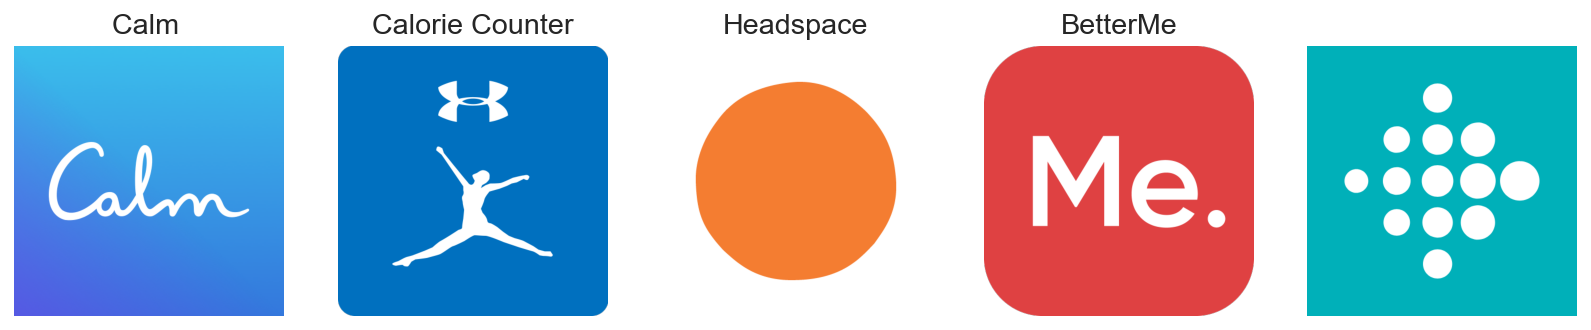

In [10]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
        return title[:15]
fig, axs = plt.subplots(1,5,figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

### Obtaining app reviews:

In [11]:
help(reviews)

Help on function reviews in module google_play_scraper.features.reviews:

reviews(app_id, lang=None, country=None, sort=None, count=None, filter_score_with=None, continuation_token=None)



In [12]:
#looking at reviews function and learning...
calm, continuation_token = reviews('com.calm.android', lang='en', country='us',sort=Sort.MOST_RELEVANT, count=3)
calm

[{'reviewId': 'gp:AOqpTOHJ6MwKNvmoxIaWnWIecIl8g5AEfy0mwDBwwx2ZnN8cPxd6p8PUE-xbcFwBDi8Tl2bFWmvkQIC5RY7zqA',
  'userName': 'Jesús Domínguez',
  'userImage': 'https://lh3.googleusercontent.com/a-/AOh14GjPg5UpGX-k7dr6gGtWEqFiFpLMpJkknO7Z9l0MFg',
  'content': "COULD BE PERFEC. I think this app could be perfect. The content is amazing; however, there are a couple of technical fails that keeps this app away from being perfect. First, there is no cast option. At this time you can't justify not having the cast feature on an app that plays music. Second, you should allow users to have at least two profiles per account. I know you need the subscription to keep the service running, but this is not a cheap subscription (It's not expensive either) so you could allow users to create at least two different profiles. Why do I think two profiles are needed? Just imagine using the app to play some calming music to your kids before sleep. Then, that time will be counted as your own mindful minutes or one 

saving for api usage: 
https://github.com/JoMingyu/google-play-scraper

better than this one: 
https://github.com/facundoolano/google-play-scraper#reviews


In [13]:
#iterating through each of the app packages to grab reviews on each grabbing 10K each based on relevance
results = []
for ap in tqdm(app_packages):
    result, continuation_token = reviews(
    ap,
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT SQL-like calls
    count = 10000, # defaults to 100, returns number of records you want
    filter_score_with=None) # defaults to None(means all score) might be usefull to scrape some more low scores if needed
    
    for a in result:
        a['application'] = ap #tracking which app we grabbed review of
        
    results.extend(result)

100%|██████████| 5/5 [03:06<00:00, 37.26s/it]


In [14]:
len(results)

50000

In [15]:
#creating files to work from and .csv if needed
app_reviews_df = pd.DataFrame(results)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

## Data Description

|**Field**  | **Description**|
|--|--|
|ReviewId | a unique identifier for each review|
|userName  | Name of user that reviewed the product|
|userImage | User avatar??? (need to explore)|
|content | The text supporting the stars assigned at the review|
|thumbsUpCount | count of how many other users appreciated the review (helps for relevance)|
|reviewCreatedVersion | The version of the app being reviewed|
|at | the review date
|replyContent | Text/content if there is a reply to a review from the app administrators|
|repliedAt | Timestamp for the replyContent field
|application| the app being reviewed


In [16]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,application
0,gp:AOqpTOHJ6MwKNvmoxIaWnWIecIl8g5AEfy0mwDBwwx2...,Jesús Domínguez,https://lh3.googleusercontent.com/a-/AOh14GjPg...,COULD BE PERFEC. I think this app could be per...,3,173,4.28,2020-07-01 09:14:26,None,NaT,com.calm.android
1,gp:AOqpTOHqY7LdB_LM2G-_3P2v2up5xb6p_s1r3n1a4LW...,Phl Smyth,https://lh3.googleusercontent.com/-YOCPoUMvv0Y...,I really like the majority of this app. The mu...,4,133,4.28,2020-06-30 17:46:59,None,NaT,com.calm.android
2,gp:AOqpTOGMnTsRh7PUBhsKYspzHk9Y0ZydjMMwTviVoas...,L. Oliva,https://lh3.googleusercontent.com/a-/AOh14Gi97...,"The main person, Tamara Levitt, has a voice th...",1,3,4.28,2020-07-02 08:51:14,None,NaT,com.calm.android
3,gp:AOqpTOGgwrYI8y9iOYPYPxCOHm8rdf4SS37ID-N4yRk...,Desi Alvarez,https://lh3.googleusercontent.com/a-/AOh14Ggko...,I was not informed that there was a yearly fee...,1,36,4.28,2020-06-28 23:33:44,None,NaT,com.calm.android
4,gp:AOqpTOF4Q--AmpuPUohfY3SeNar4GMqqLgjXHZifwni...,Angry Juice,https://lh3.googleusercontent.com/a-/AOh14GhWD...,"Calm is aboslutly wonderful, I live in a disfu...",5,6,4.28,2020-07-01 22:54:58,None,NaT,com.calm.android


## A first look at the data 

#### observation: good to see not as imbalanced as in cases past.  :-P  'will need to look into missing data.

In [17]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
reviewId                50000 non-null object
userName                50000 non-null object
userImage               50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    45295 non-null object
at                      50000 non-null datetime64[ns]
replyContent            19573 non-null object
repliedAt               19573 non-null datetime64[ns]
application             50000 non-null object
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.2+ MB


Text(0, 0.5, 'Count')

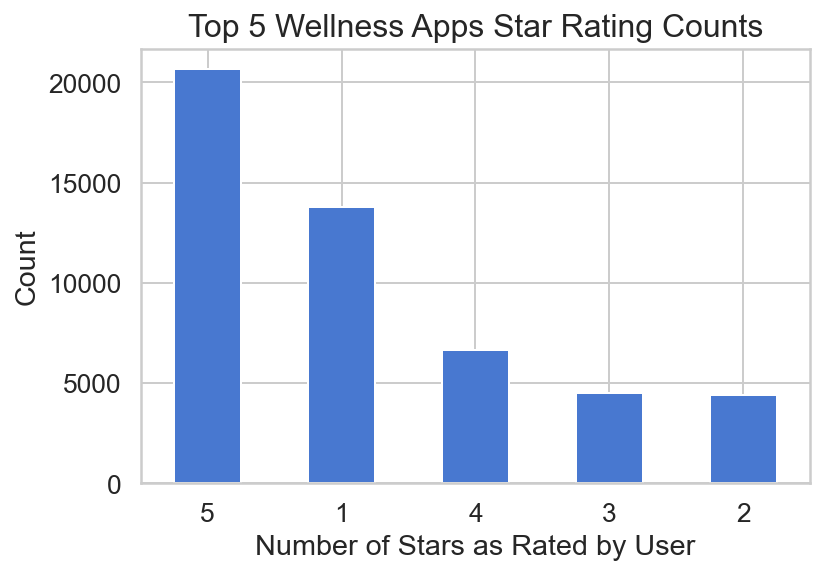

In [18]:
#counting how many reviews fall into each category
app_reviews_df['score'].value_counts().plot(kind='bar')
plt.title('Top 5 Wellness Apps Star Rating Counts', fontsize=16)
plt.xlabel('Number of Stars as Rated by User')
plt.xticks(rotation=0) 
plt.ylabel('Count')

Obervation: Top and bottom ratings are the most frequently occuring accross all 5 apps

In [19]:
app_reviews_df['application'].value_counts()

com.getsomeheadspace.android    10000
com.gen.workoutme               10000
com.myfitnesspal.android        10000
com.fitbit.FitbitMobile         10000
com.calm.android                10000
Name: application, dtype: int64

In [20]:
calm_df = app_reviews_df[app_reviews_df['application'] == 'com.calm.android']
fitpal_df = app_reviews_df[app_reviews_df['application'] == 'com.myfitnesspal.android']
me_df = app_reviews_df[app_reviews_df['application'] == 'com.gen.workoutme']
headspace_df = app_reviews_df[app_reviews_df['application'] == 'com.getsomeheadspace.android']
fitbit_df = app_reviews_df[app_reviews_df['application'] == 'com.fitbit.FitbitMobile']

# Scrub / Clean

## ...missing data and associated patterns:

In [27]:
import missingno as msno

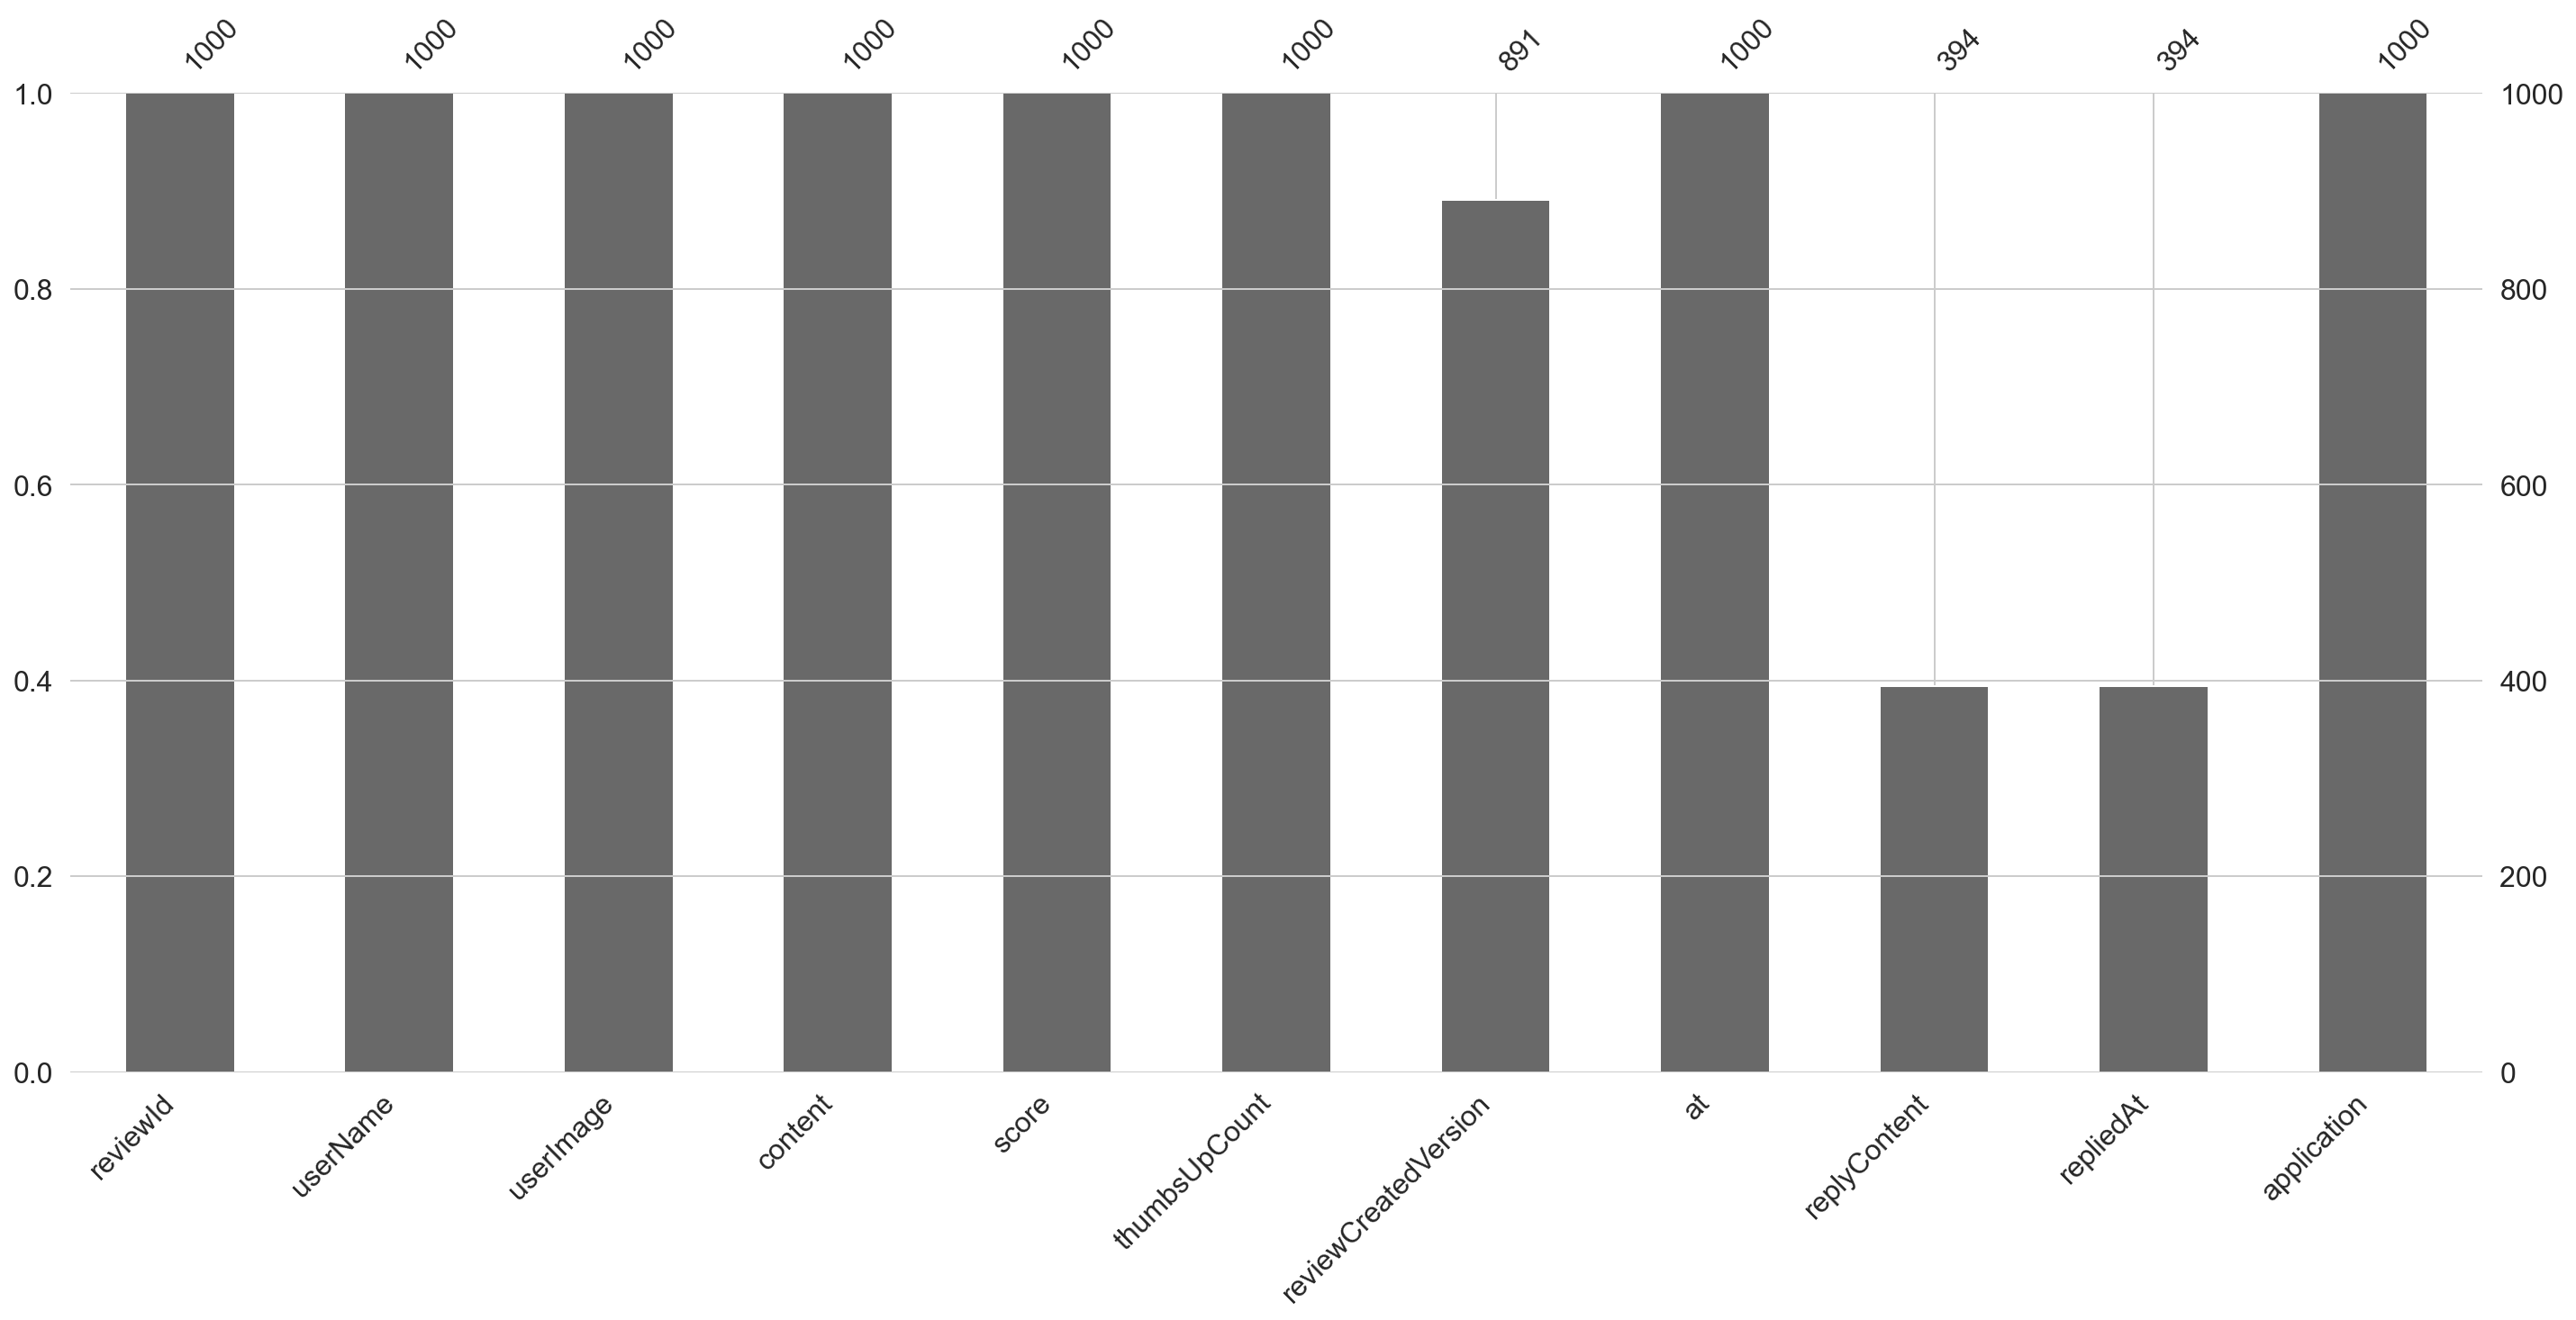

In [28]:
msno.bar(app_reviews_df.sample(1000))

In [29]:
#repliedAt and replyConentent are directly related and could give time series insight?

In [71]:
#creating a copy database for eda
df = app_reviews_df.copy()

In [72]:
#Hypothesising replyContent is in response to reviews - probably bad ones - isolating only those with replyContent:
df1 = df[df['replyContent'].notnull()]

In [73]:
df1['score'].value_counts(normalize=True)

1    0.459357
5    0.244878
2    0.126603
3    0.089664
4    0.079497
Name: score, dtype: float64

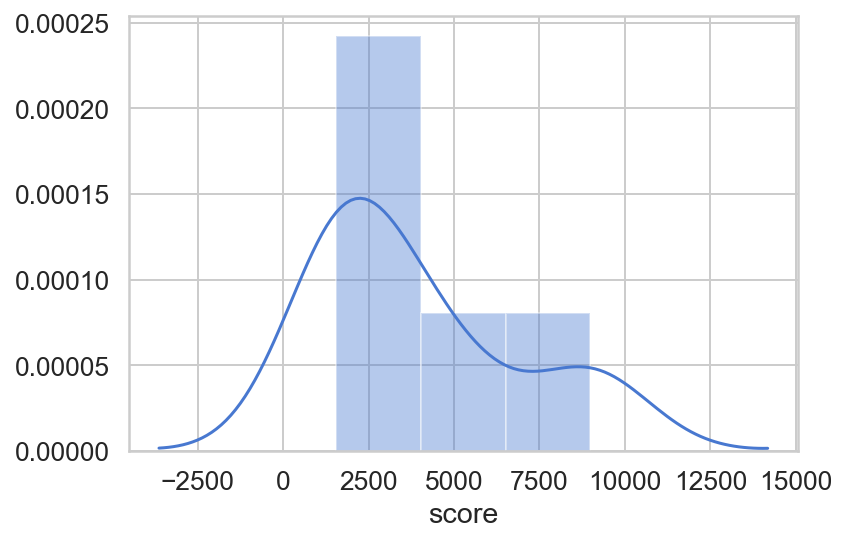

In [33]:
reply_content_counts = df1['score'].value_counts()
sns.distplot(reply_content_counts)

**Majority (~ 46%) scores for replyContent response are 1 star reviews...  confirms hypothesis that this field is in response to poor reviews see examples below, but also gives insight that responses also occur for most positive comments as well (25%)**

In [34]:
df1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,application
97,gp:AOqpTOH65G6Vlr-tVaPVvRLnD2Q4a2kGO6mMSkmeLgL...,Tarsha Brind,https://lh3.googleusercontent.com/-J75_ZtkgxBg...,Love the app.. brought the premium subscriptio...,4,2,4.27.1,2020-06-16 22:58:20,Apologies for the trouble. Please reach out vi...,2020-04-29 22:23:29,com.calm.android
157,gp:AOqpTOFAq9ozQ9HUC0HY6jd39rqYymSxU14PRIi7XCb...,Laura Friars,https://lh3.googleusercontent.com/a-/AOh14GjeN...,"My favourite app, i am very reliant on this ap...",5,36,4.27,2020-06-06 17:03:10,"Hi there, I'm so sorry for the trouble! We've ...",2019-07-10 14:21:18,com.calm.android
187,gp:AOqpTOH9HnSx3KniUUGJIhuEx8aZBgfYXVtFuCtj7r7...,Shamik Saha,https://lh3.googleusercontent.com/a-/AOh14GiRb...,Agree with Gianna. Earlier a lot of stuff was ...,1,532,4.26,2020-05-23 23:43:19,Apologies for the trouble. Please reach out vi...,2020-05-15 22:30:04,com.calm.android
190,gp:AOqpTOFTLBxM1bj9ERrvsWVTsmez9W1hS-j66b9FuEM...,Alarec Scarbrow,https://lh3.googleusercontent.com/a-/AOh14GiIn...,This disgustingly priced ($70) app with limite...,1,185,4.24,2020-04-25 19:08:52,"Hi there, We offer a free version of the app i...",2020-04-27 13:55:16,com.calm.android
199,gp:AOqpTOFDf5YnHYENFVf2CNg8wgflG8t4GSlpbfR2R4C...,sasha pierce,https://lh3.googleusercontent.com/-dp45ilwAuTQ...,It keeps crashing. Even when I uninstalled and...,1,150,4.25,2020-05-05 23:31:30,Apologies for the trouble. Please reach out vi...,2020-05-05 23:52:08,com.calm.android


In [35]:
#pd.set_option('display.max_colwidth', -1)

In [36]:
display(df1['replyContent'])

97       Apologies for the trouble. Please reach out vi...
157      Hi there, I'm so sorry for the trouble! We've ...
187      Apologies for the trouble. Please reach out vi...
190      Hi there, We offer a free version of the app i...
199      Apologies for the trouble. Please reach out vi...
                               ...                        
49995    Hi Emmy -  We apologize for all the inconvenie...
49996    Hi Dr Sonal - Let us assist. If your Fitbit de...
49997    Hi Lady - Let's help you with your step and ac...
49998    Hi Robert - Sorry about the sync difficulty. F...
49999    Hi Lindsey - Sorry to hear about the issue you...
Name: replyContent, Length: 19573, dtype: object

In [69]:
#looks like there is only one entry per reviewId
vc = df1['reviewId'].value_counts()
vc[1]>1

False

In [77]:
# ## filling in missing data:
# app_reviews_df['reviewCreatedVersion'].fillna('missing')
# app_reviews_df['replyContent'].fillna('NA')
# app_reviews_df['repliedAt'].fillna('NA')

0                         NA
1                         NA
2                         NA
3                         NA
4                         NA
                ...         
49995    2020-02-25 05:00:32
49996    2020-02-28 05:00:36
49997    2020-03-01 05:00:34
49998    2020-02-27 17:01:26
49999    2020-02-27 17:00:44
Name: repliedAt, Length: 50000, dtype: object

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19573 entries, 97 to 49999
Data columns (total 11 columns):
reviewId                19573 non-null object
userName                19573 non-null object
userImage               19573 non-null object
content                 19573 non-null object
score                   19573 non-null int64
thumbsUpCount           19573 non-null int64
reviewCreatedVersion    16633 non-null object
at                      19573 non-null datetime64[ns]
replyContent            19573 non-null object
repliedAt               19573 non-null datetime64[ns]
application             19573 non-null object
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.8+ MB


In [95]:
display(df1['userImage'][2:3:])

187    https://lh3.googleusercontent.com/a-/AOh14GiRb...
Name: userImage, dtype: object

# Explore

### Comparing Apps in Terms of Ratings:

In [75]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 0.98, 'Comparative Ratings Across Top 5 Wellness Apps')

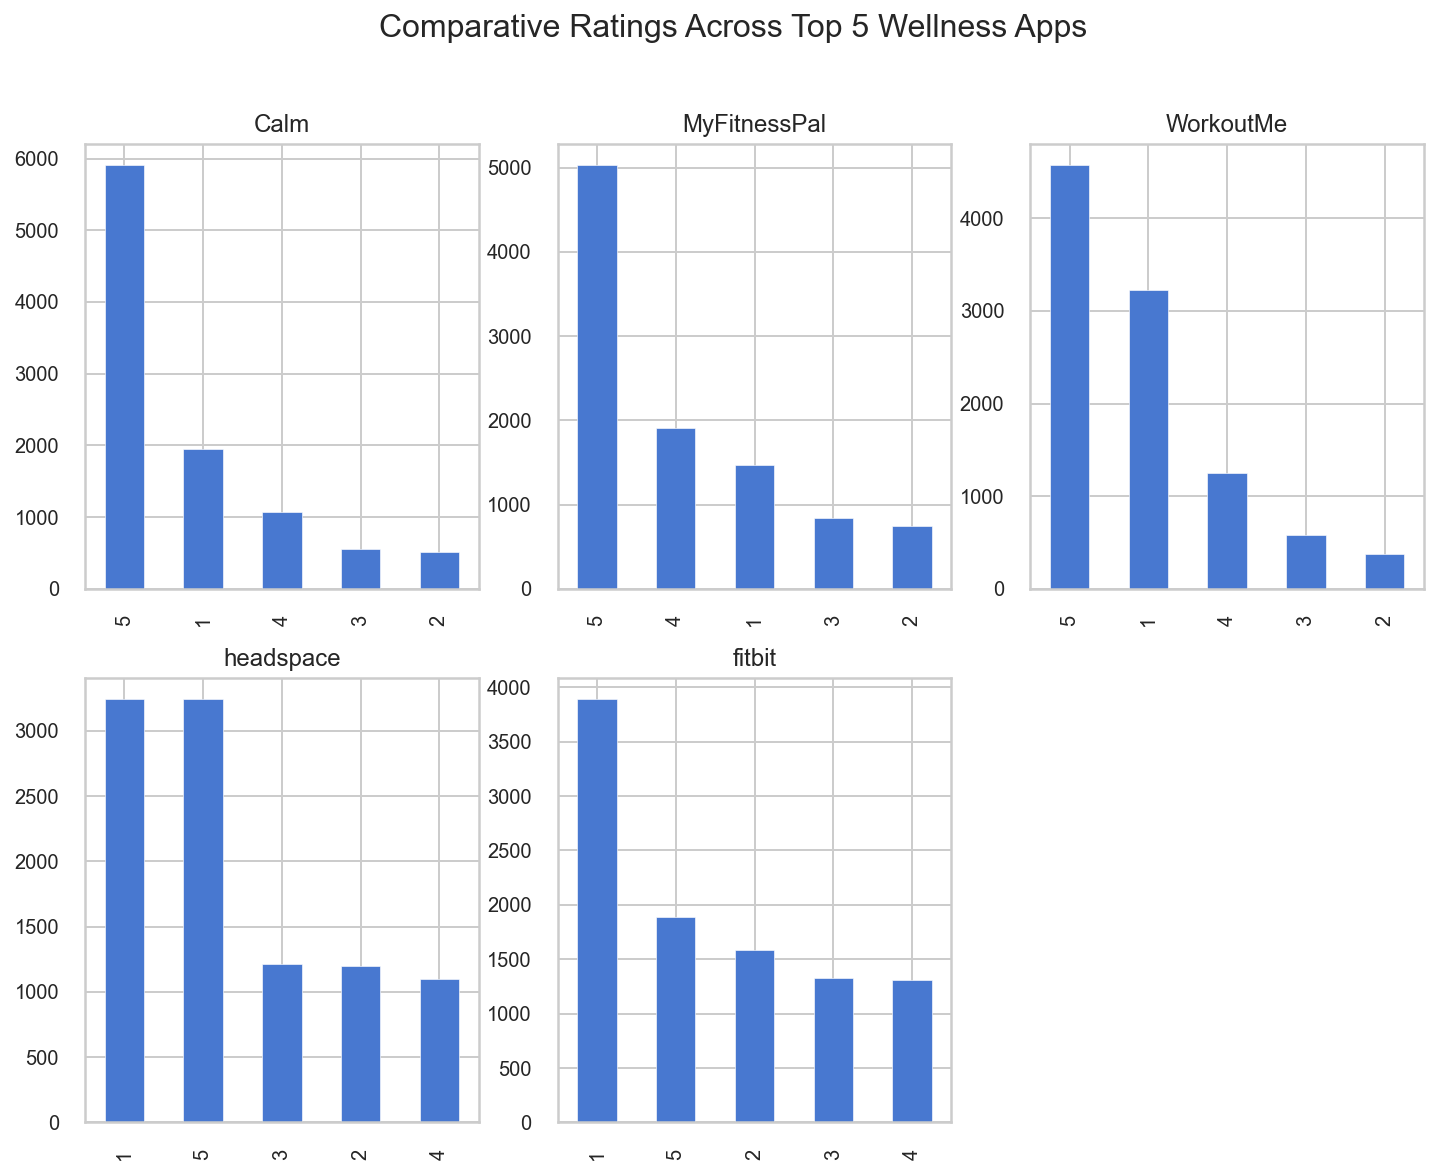

In [76]:
#comparing each app in terms of ratings(need to clean code see subsequent cells)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))
calm_df['score'].value_counts().plot(kind='bar',ax=axs[0][0], title='Calm')
fitpal_df['score'].value_counts().plot(kind='bar', ax=axs[0][1], title='MyFitnessPal')
me_df['score'].value_counts().plot(kind='bar', ax=axs[0][2], title='WorkoutMe')
headspace_df['score'].value_counts().plot(kind='bar', ax=axs[1][0], title='headspace')
fitbit_df['score'].value_counts().plot(kind='bar', ax=axs[1][1], title='fitbit')
fig.delaxes(ax=axs[1][2])
ax.get_subplotspec().rowspan.start
fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', fontsize=16)


**Observation:** Interesting comparing mediations... Calm as more than 2X 5 star ratings and headspace has almost equal 1* and 5* ratings!?! Fitbit has a majority count of 1* ratings?? AND is among top grossing apps? need to look at timestamps/versions....(and up my coding game to better document and not look so noobie)

In [22]:
#trying to simplify code..and failing
# list_of_dfs = [calm_df, fitpal_df, me_df, headspace_df, fitbit_df]
# for df in list_of_dfs:
#     df['score'].value_counts().plot(kind='bar')

In [23]:
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))
# for df in list_of_dfs:
#     df['score'].value_counts().plot(kind='bar',title='df')
#     fig.delaxes(ax=axs[1][2])
#     ax.get_subplotspec().rowspan.start
#     fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', fontsize=16)

### Versions

In [24]:
#looking for various app versions to perhaps evauluate ratings based on version improvements? 
#245 versions between the 5 apps
app_reviews_df['reviewCreatedVersion'].value_counts()

3.21       1913
20.7.0     1854
20.10.0    1317
3.57.0     1237
3.23       1235
           ... 
2.7.5         1
3.1           1
2.7.7         1
3.1.2         1
4.0.2         1
Name: reviewCreatedVersion, Length: 246, dtype: int64

Comparing highest rated and lowest rated fitness-baesd apps by version count:

In [26]:
#Isolating myfitnesspal app to see how many versions: 14 
app_reviews_df.groupby('application').get_group('com.myfitnesspal.android')['reviewCreatedVersion'].value_counts()

20.7.0     1854
20.10.0    1317
20.11.1    1198
20.6.1     1167
20.9.0     1166
20.2.1      994
20.1.0      716
20.6.0      507
20.5.0      447
20.3.0      292
20.4.1      160
20.11.0     127
20.12.0      34
20.8.0       17
20.4.0        4
Name: reviewCreatedVersion, dtype: int64

In [ ]:
app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()

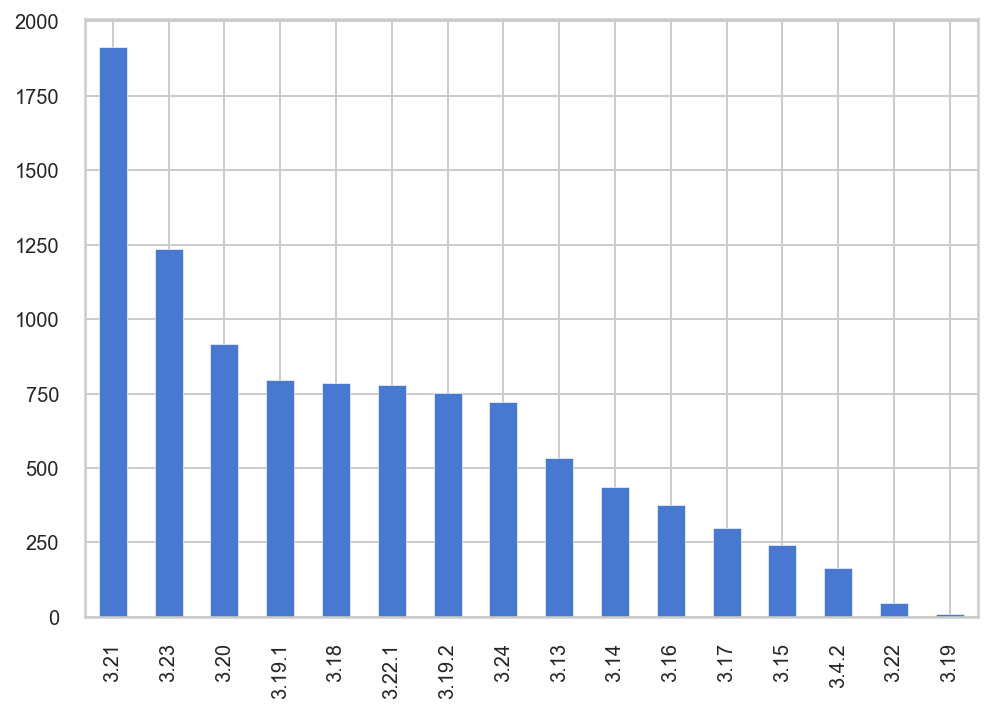

In [79]:
#Isolating fitbit app to see how many versions: 17 
app_version_fitbit = app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()
app_version_fitbit.plot(kind='bar')

In [83]:
!pip install interact
import interact

  Created wheel for interact: filename=interact-0.2-cp36-none-any.whl size=1543 sha256=c9d74b288a6f5897312d80db681fb26d1eedc21a588e72796e85733ec7d30448
  Stored in directory: C:\Users\aosika\AppData\Local\pip\Cache\wheels\94\f4\b9\fcbf9f76f4b3e9f6d9d8f13879a0eb3b4e72e9fe7d0a8829cc
Successfully built interact


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

Durin

TypeError: unsupported operand type(s) for +: 'dict_items' and 'dict_items'

In [ ]:
# Clean this up to look at versions...

In [98]:
def plt_compare(x):
    app_reviews_df.groupby('application').get_group(x)['reviewCreatedVersion'].value_counts().plot(kind='bar')

## To DO - function not working

In [ ]:
for app in app_reviews_df['application']:
    plt_compare(app)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000014F971B9730> (for post_execute):


KeyboardInterrupt: 

## Whats in a review?

In [37]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aosika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
clean_df = df.copy()

In [39]:
clean_df['content'] = clean_df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))

clean_df['content']

0        COULD BE PERFEC. I think app could perfect. Th...
1        I really like majority app. The music sleep st...
2        The main person, Tamara Levitt, voice grates m...
3        I informed yearly fee use app. And fee $70! Th...
4        Calm aboslutly wonderful, I live disfunctional...
                               ...                        
49995    Used love fitbit, never problems. Having issue...
49996    Edit - All I charge Versa. By time I want use ...
49997    Steps dont register alot times I'm wearing cor...
49998    Will sync keeps saying device found . It great...
49999    It worked well first. Know order sync Fitbit c...
Name: content, Length: 50000, dtype: object

In [40]:
from wordcloud import WordCloud

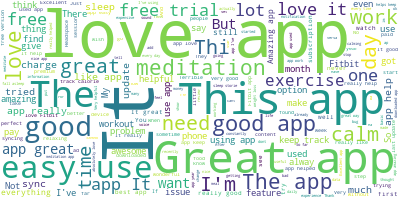

In [41]:

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(clean_df['content'].to_string())

wordcloud.to_image()

### TO DOS:

In [42]:
#need to clean clearly.... app is repeated 6+ times?!
#model words associated with various ratings?


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19573 entries, 97 to 49999
Data columns (total 11 columns):
reviewId                19573 non-null object
userName                19573 non-null object
userImage               19573 non-null object
content                 19573 non-null object
score                   19573 non-null int64
thumbsUpCount           19573 non-null int64
reviewCreatedVersion    16633 non-null object
at                      19573 non-null datetime64[ns]
replyContent            19573 non-null object
repliedAt               19573 non-null datetime64[ns]
application             19573 non-null object
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.8+ MB


In [44]:
#!pip install timestamp

In [45]:
import timestamp

going to look at timespan, 

In [46]:
import plotly.express as px

In [47]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [48]:
plt.style.use('seaborn-notebook')

# Model